In [9]:
import os
from os import path
import torch
from torch import nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import torchvision.models as models
from torchvision.transforms import ToTensor, ToPILImage, Lambda
import matplotlib.pyplot as plt
import math
import autolens as al

from PIL import Image

import numpy as np
import pandas as pd
from torchvision.io import read_image

In [14]:
raw_images_dir = "__local/data/Cosmosim/slacs/raw"
processed_images_dir = "__local/data/Cosmosim/slacs/output"

In [37]:
images = []
for filename in os.listdir(raw_images_dir):
    raw_image = al.Imaging.from_fits(
        data_path=path.join(raw_images_dir, filename,  "F814W_image.fits"),
        noise_map_path=path.join(raw_images_dir, filename, "F814W_noise_map.fits"),
        psf_path=path.join(raw_images_dir, filename, "F814W_psf.fits"),
        pixel_scales=0.05
    )

    data = np.array(raw_image.data)
    
    lower_percentile = 1
    upper_percentile = 95

    lower_limit = np.percentile(data, lower_percentile)
    upper_limit = np.percentile(data, upper_percentile)

    normalized_data = np.clip(data, lower_limit, upper_limit)
    normalized_data = ((normalized_data - lower_limit) / (upper_limit - lower_limit) * 255).astype(np.uint8)

    normalized_data = normalized_data.reshape(281,281)
    image = Image.fromarray(normalized_data).convert('L')
    image.save(path.join(processed_images_dir, '{}.png'.format(filename)))
    images.append(image)
    

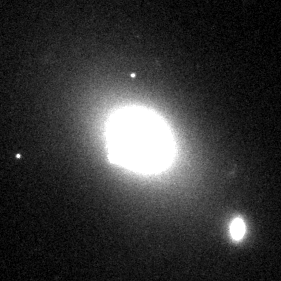

In [30]:
images[0]